<a href="https://colab.research.google.com/github/gobbedy/deep_learning_adversarial_training/blob/master/CodeKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
print(tf.__version__)

1.12.0


In [3]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.models import Sequential 
from keras.preprocessing import sequence

Using TensorFlow backend.


**CIFAR10**

In [0]:
from keras.datasets import cifar10
(X_train, Y_train_), (X_test, Y_test_) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
from keras.utils import to_categorical
Y_train = to_categorical(Y_train_)
Y_test = to_categorical(Y_test_)
input_shape = (32,32,3)

**MNIST**

In [19]:
from keras.datasets import mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [0]:
input_shape=(28,28,1)

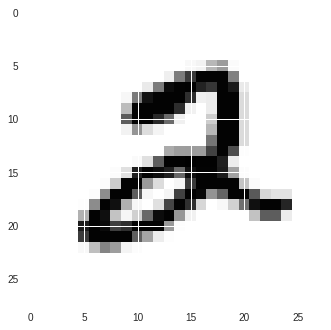

In [20]:
plt.imshow(X_train[5])

Preprocessing

In [0]:
input_dim = 784 #28*28 
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
# Normalize the values to [0,1]
X_train /= 255 
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

**CNN**

In [6]:
output_dim = 10 
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

batch_size = 128 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.


In [7]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,verbose=1, validation_data=(X_test, Y_test)) 

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7330 - acc: 0.3658 - val_loss: 1.4237 - val_acc: 0.5075
Epoch 2/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.4784 - acc: 0.4664 - val_loss: 1.2943 - val_acc: 0.5462
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3824 - acc: 0.5046 - val_loss: 1.2402 - val_acc: 0.5680
Epoch 4/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3223 - acc: 0.5270 - val_loss: 1.1886 - val_acc: 0.5847
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2817 - acc: 0.5413 - val_loss: 1.1609 - val_acc: 0.5895
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2417 - acc: 0.5548 - val_loss: 1.1109 - val_acc: 0.6067
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.2138 - acc: 0.5659 - val_loss: 1.1202 - 

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

**Removed Dropout in FC**


In [0]:
from keras.layers.normalization import BatchNormalization

In [11]:
output_dim = 10 
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=input_shape)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

batch_size = 128 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [12]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,verbose=1, validation_data=(X_test, Y_test)) 

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

('Test score:', 0.04275799519476063)
('Test accuracy:', 0.9901)


**VGGNET**

In [0]:
def VGG_16(input_shape,weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=input_shape))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [10]:

model = VGG_16(input_shape)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-

In [0]:
batch_size = 128 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=50,verbose=1, validation_data=(X_test, Y_test)) 

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 84s 2ms/step - loss: 2.3032 - acc: 0.0997 - val_loss: 2.3029 - val_acc: 0.1000
Epoch 2/50
16256/50000 [========>.....................] - ETA: 50s - loss: 2.3030 - acc: 0.0997

KeyboardInterrupt: ignored